In [61]:
from pathlib import Path

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import nltk
from nltk import word_tokenize          
from nltk.stem.snowball import EnglishStemmer 
import matplotlib.pylab as plt
import pyLDAvis

import dmba
from dmba import printTermDocumentMatrix, classificationSummary, liftChart

import random
from faker import Faker
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
nltk.download('punkt')
from gensim import corpora
from gensim.models import LdaModel
from gensim import models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
import nltk
import PyPDF2
from gensim import corpora, models
from wordcloud import WordCloud
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem.wordnet import WordNetLemmatizer
import gensim

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dashuaibi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dashuaibi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/ZorroHZR/MMAI-5000/main/farm-ads.csv")

# Assign column names
df.columns = ['Label', 'Text']

In [63]:
df['Label'] = df['Label'].map({-1: 0, 1: 1})

In [64]:
df.head()

,Label,Text
0,0,ad-abdominal ad-aortic ad-aneurysm ad-million...
1,0,ad-absorbent ad-oil ad-snar ad-factory ad-dir...
2,0,ad-acid ad-reflux ad-relief ad-top ad-treatme...
3,0,ad-acid ad-reflux ad-symptom ad-acid ad-reflu...
4,0,ad-addiction ad-treatment ad-detox ad-opioid ...


Q1

In [65]:
# Learn features based on text
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['Text'])

# Apply TF-IDF Normalization
transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(counts)

# Dimensionality Reduction to create a Concept-Document Matrix
svd_model = TruncatedSVD(n_components=20, random_state=42)
X_concept = svd_model.fit_transform(X_tfidf)

Q2

In [66]:
import numpy as np
import pandas as pd

# Assuming 'counts' is the Term-Document matrix you have from the CountVectorizer
# Convert it to a dense format because the TDM is typically sparse
dense_counts = counts.toarray()

# Convert to DataFrame for easier handling
terms = count_vect.get_feature_names_out()  # This gets the list of terms in the order they're stored in the matrix
tdm_df = pd.DataFrame(dense_counts, columns=terms)

# Sum up each term's occurrences across all documents and sort them to find the most frequent terms
most_frequent_terms = tdm_df.sum(axis=0).sort_values(ascending=False).head(10)  # Adjust as necessary to see more terms

# Print the most frequent terms
print("Most frequently appearing terms in the corpus:")
print(most_frequent_terms)

# Print the entries for 'pet' and 'health'
print(f"Entries for 'pet':\n{tdm_df['pet']}")
print(f"Entries for 'health':\n{tdm_df['health']}")

# Print the total counts for 'pet' and 'health'
print(f"Total count for 'pet': {tdm_df['pet'].sum()}")
print(f"Total count for 'health': {tdm_df['health'].sum()}")

Most frequently appearing terms in the corpus:
ad         45424
title      23542
header     14509
list       11228
product    11154
com        10704
pet         7057
health      6202
home        5870
free        5854
dtype: int64
Entries for 'pet':
0        0
1        0
2        0
3        0
4        0
        ..
4137    53
4138    53
4139    53
4140    49
4141    53
Name: pet, Length: 4142, dtype: int64
Entries for 'health':
0        0
1        0
2        0
3        1
4        0
        ..
4137    10
4138     9
4139     9
4140     9
4141     9
Name: health, Length: 4142, dtype: int64
Total count for 'pet': 7057
Total count for 'health': 6202


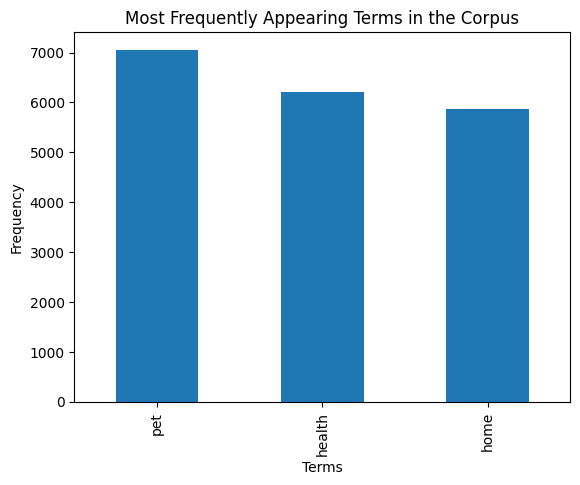

In [77]:
import matplotlib.pyplot as plt

# Assuming 'most_frequent_terms' is a pandas Series like the one in your example
most_frequent_terms = pd.Series({
    'pet': 7057,
    'health': 6202,
    'home': 5870,
})

# Create a bar plot
most_frequent_terms.plot(kind='bar')

# Adding titles and labels
plt.title('Most Frequently Appearing Terms in the Corpus')
plt.xlabel('Terms')
plt.ylabel('Frequency')

# Show the plot
plt.show()


The chosen 2 entries are pet and health.</br>
The first non-zero entry is 'pet', indicates that the term 'pet' appears 53 time in the 4138th document. The second non-zero entry is 'health', indicates that the term 'health' appears 10 time in the 4138th document. It may show that pet health is the main focus of ad 4138.</br>
By looking at the frequncy table, pet and health are both top 10 most frequent appeared terms in the dataset, which means that the ad in the dataset are mainly related to pet and health</br>

# label distribution graph

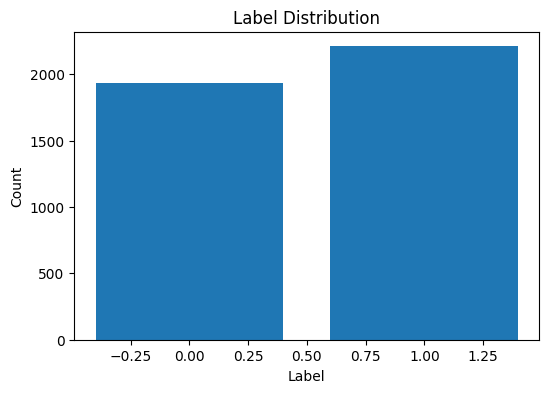

In [68]:
import matplotlib.pyplot as plt

label_counts = df['Label'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

In [69]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
class LemmaTokenizer(object):
    def __init__(self):
        self.stemmer = EnglishStemmer()
        self.stopWords = set(ENGLISH_STOP_WORDS)
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) 
                if t.isalpha() and t not in self.stopWords]

preprocessor = CountVectorizer(tokenizer=LemmaTokenizer(), encoding='latin1')
preprocessedText = preprocessor.fit_transform(df['Text'])

c:\Users\dashuaibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [70]:
# Step 3: TF-IDF and latent semantic analysis
tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(preprocessedText)

# Extract 20 concepts using LSA ()
svd = TruncatedSVD(20)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)

Concept-Document matrix Model

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

label = df['Label']

# Split dataset into 75% training and 25% test set
X_train, X_test, y_train, y_test = train_test_split(lsa_tfidf, label, test_size=0.25, random_state=42)

# Run logistic regression model on training set
logit_reg = LogisticRegression(solver='lbfgs', max_iter=1000)  # Increased max_iter for convergence if needed

# Perform cross-validation
cv_scores = cross_val_score(logit_reg, X_train, y_train, cv=5)

logit_reg.fit(X_train, y_train)

# Predict on test set
y_pred = logit_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {np.mean(cv_scores)}')
print(f'Accuracy Score on the test set: {accuracy}')

Cross-validation scores: [0.81511254 0.79227053 0.80193237 0.80193237 0.79549114]
Mean CV accuracy: 0.8013477898421278
Accuracy Score on the test set: 0.7915057915057915


Term-Document matrix Model

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split dataset into 75% training and 25% test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(tfidf, label, test_size=0.25, random_state=42)

# Run logistic regression model on training set
logit_reg = LogisticRegression(solver='lbfgs', max_iter=1000)  # Increased max_iter for convergence if needed

# Perform cross-validation
cv_scores = cross_val_score(logit_reg, X_train1, y_train1, cv=5)

logit_reg.fit(X_train1, y_train1)

# Predict on test set
y_pred = logit_reg.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred)

# Print the accuracy score and the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {np.mean(cv_scores)}')
print(f'Accuracy Score on the test set: {accuracy}')

Cross-validation scores: [0.8681672  0.88083736 0.86312399 0.90338164 0.88244767]
Mean CV accuracy: 0.8795915725595581
Accuracy Score on the test set: 0.8803088803088803


Concept-Document matrix Model #2

In [73]:
# Extract 50 concepts using LSA ()
svd = TruncatedSVD(1000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf1 = lsa.fit_transform(tfidf)

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

label = df['Label']

# Split dataset into 75% training and 25% test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(lsa_tfidf1, label, test_size=0.25, random_state=42)

# Run logistic regression model on training set
logit_reg = LogisticRegression(solver='lbfgs', max_iter=1000)  # Increased max_iter for convergence if needed

# Perform cross-validation
cv_scores = cross_val_score(logit_reg, X_train2, y_train2, cv=5)

logit_reg.fit(X_train2, y_train2)

# Predict on test set
y_pred = logit_reg.predict(X_test2)

# Calculate accuracy
accuracy = accuracy_score(y_test2, y_pred)

# Print the accuracy score and the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {np.mean(cv_scores)}')
print(f'Accuracy Score on the test set: {accuracy}')

Cross-validation scores: [0.87138264 0.88888889 0.85829308 0.90338164 0.88083736]
Mean CV accuracy: 0.8805567205679047
Accuracy Score on the test set: 0.8832046332046332


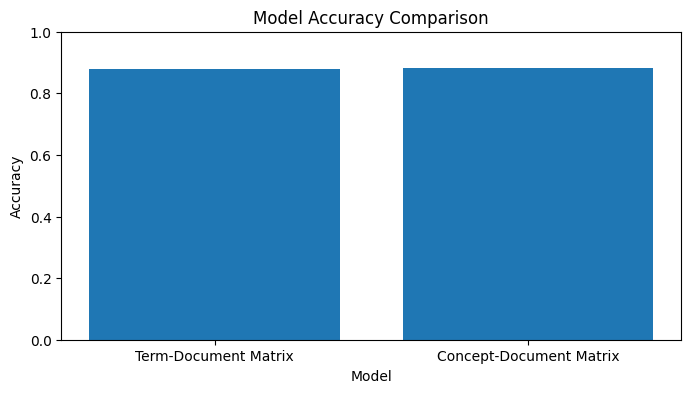

In [75]:
import matplotlib.pyplot as plt

models = ['Term-Document Matrix', 'Concept-Document Matrix']
accuracies = [0.8795915725595581, 0.8812741312741312]  

plt.figure(figsize=(8, 4))
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

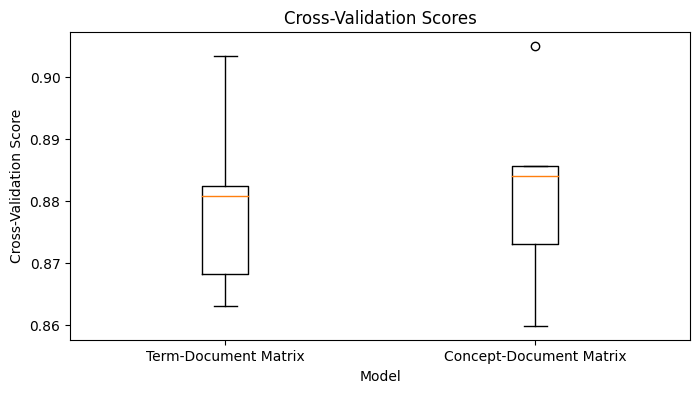

In [76]:
import matplotlib.pyplot as plt

cv_scores_tdm = [0.8681672,  0.88083736, 0.86312399, 0.90338164, 0.88244767]
cv_scores_cdm = [0.87299035, 0.88566828, 0.85990338, 0.90499195, 0.88405797] 

plt.figure(figsize=(8, 4))
plt.boxplot([cv_scores_tdm, cv_scores_cdm], labels=['Term-Document Matrix', 'Concept-Document Matrix'])
plt.xlabel('Model')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores')
plt.show()

Briefly explain the difference between the Term-Document matrix and the Concept-Document matrix.(2 points) </br>
Chatgpt, show the difference and the best situation for using both matrix </br> 
Identify and list the name of the dimensionality reduction technique, the Concept-Document matrix is most closely related to? (2 points) </br>
Chatgpt</br>
Is using Concept-Document matrix better than Term-Document matrix to identify key predictor variables? Briefly explain your answer (4 points) </br>
Use the two accuracy rate to show that the td-if is better, cos the higher accuracy rate</br>